In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
kk = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
kk.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
kk.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
kk.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
kk.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
kk.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
kk.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#Cleaning Start

In [10]:
kk.drop(columns=['Name','Ticket'],inplace=True)

In [11]:
kk.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
kk.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
kk.shape


(891, 10)

In [14]:
kk = kk[kk.Age>0]

In [15]:
kk.shape

(714, 10)

In [16]:
kk.Age.mean()

29.69911764705882

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
n=SimpleImputer(strategy='mean')
s=SimpleImputer(strategy='most_frequent')

In [19]:
kk.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
numeric_select = ['PassengerId','Survived','Pclass','SibSp','Parch','Age','Fare']
string_select = ['Sex','Cabin','Embarked']

In [21]:
kk[numeric_select] = n.fit_transform(kk[numeric_select])
kk[numeric_select]

,PassengerId,Survived,Pclass,SibSp,Parch,Age,Fare
0,1.0,0.0,3.0,1.0,0.0,22.0,7.2500
1,2.0,1.0,1.0,1.0,0.0,38.0,71.2833
2,3.0,1.0,3.0,0.0,0.0,26.0,7.9250
3,4.0,1.0,1.0,1.0,0.0,35.0,53.1000
4,5.0,0.0,3.0,0.0,0.0,35.0,8.0500
...,...,...,...,...,...,...,...
885,886.0,0.0,3.0,0.0,5.0,39.0,29.1250
886,887.0,0.0,2.0,0.0,0.0,27.0,13.0000
887,888.0,1.0,1.0,0.0,0.0,19.0,30.0000
889,890.0,1.0,1.0,0.0,0.0,26.0,30.0000


In [22]:
kk[string_select] = s.fit_transform(kk[string_select])
kk[string_select]

,Sex,Cabin,Embarked
0,male,B96 B98,S
1,female,C85,C
2,female,B96 B98,S
3,female,C123,S
4,male,B96 B98,S
...,...,...,...
885,female,B96 B98,Q
886,male,B96 B98,S
887,female,B42,S
889,male,C148,C


In [23]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Fare'>

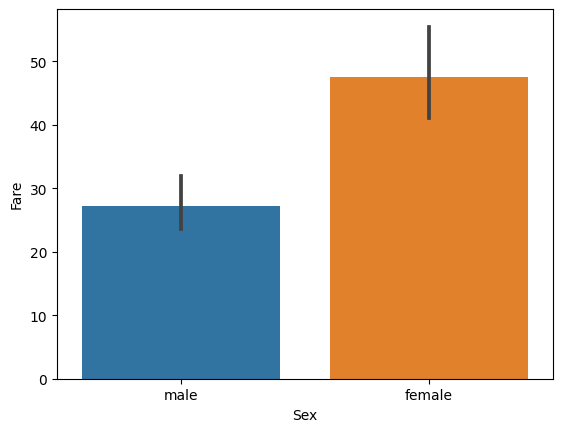

In [24]:
sns.barplot(x='Sex',y='Fare',data = kk)

In [25]:
#Cleaning over

In [26]:
#Transformation start

In [27]:
kk = kk.drop(columns=["Cabin"],axis=1)
kk

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886.0,0.0,3.0,female,39.0,0.0,5.0,29.1250,Q
886,887.0,0.0,2.0,male,27.0,0.0,0.0,13.0000,S
887,888.0,1.0,1.0,female,19.0,0.0,0.0,30.0000,S
889,890.0,1.0,1.0,male,26.0,0.0,0.0,30.0000,C


In [28]:
##convert sex to 1 and 0

In [29]:
kk['Sex']=kk.Sex.map({"male":0,'female':1})
kk

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,0,22.0,1.0,0.0,7.2500,S
1,2.0,1.0,1.0,1,38.0,1.0,0.0,71.2833,C
2,3.0,1.0,3.0,1,26.0,0.0,0.0,7.9250,S
3,4.0,1.0,1.0,1,35.0,1.0,0.0,53.1000,S
4,5.0,0.0,3.0,0,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886.0,0.0,3.0,1,39.0,0.0,5.0,29.1250,Q
886,887.0,0.0,2.0,0,27.0,0.0,0.0,13.0000,S
887,888.0,1.0,1.0,1,19.0,0.0,0.0,30.0000,S
889,890.0,1.0,1.0,0,26.0,0.0,0.0,30.0000,C


In [30]:
kk.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
kk['Embarked'] = kk.Embarked.map({'S':0,"Q":1,"C":2})

In [32]:
kk

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,0,22.0,1.0,0.0,7.2500,0
1,2.0,1.0,1.0,1,38.0,1.0,0.0,71.2833,2
2,3.0,1.0,3.0,1,26.0,0.0,0.0,7.9250,0
3,4.0,1.0,1.0,1,35.0,1.0,0.0,53.1000,0
4,5.0,0.0,3.0,0,35.0,0.0,0.0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,886.0,0.0,3.0,1,39.0,0.0,5.0,29.1250,1
886,887.0,0.0,2.0,0,27.0,0.0,0.0,13.0000,0
887,888.0,1.0,1.0,1,19.0,0.0,0.0,30.0000,0
889,890.0,1.0,1.0,0,26.0,0.0,0.0,30.0000,2


In [35]:
#Model Building

In [39]:
from sklearn.model_selection import train_test_split as tts

In [41]:
x=kk[['Pclass','Sex','Age']]
y = kk['Survived']

In [67]:
xt,xtt,yt,ytt = tts(x,y,test_size=0.2,random_state=1)

In [68]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [69]:
model = dtc()
model.fit(xt,yt)

DecisionTreeClassifier()

In [74]:
result = model.predict(xtt)
result

array([1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0.])

In [76]:
model.score(xtt,ytt)*100

84.61538461538461